<a href="https://colab.research.google.com/github/cpalme28/MAT-421/blob/main/Module_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 12 - Coree Palmer

**4.1 - Network Analysis**

* One simple way to introduce a network structure is to analyze correlations between variables and create correlation networks.
* Netwroks can be conveniently modeled by graphs, which are often referred to as a social graph.
* Networks often exhibit commubity structure within inherent clusters.
  * Clustering and community detection essentially are to discover a group of nodes in a graph that are more connected with each other within the group than those nodes outside the group.
  * Communities (cluters) are essential to gain spatio-temporal inside into big datasets from networks.
    * Spatial distances often describe the strength of network connectivity among communities.

Graph Models
* Mathematically, a graph G is denoted as pair $G(V,E)$, where $V = (v_1, v_2,..,v_n)$ represents the set of nodes and $E = (e_1, e_2,...,e_m)$ represents the set of edges.
* Edges can have directions if one node is connected to another, but not vice versa. If it is, then it is directed. If not, then it is undirected.
* A sequence of edges where nodes and edges are distinct is called a path. A closed path is called a cycle.

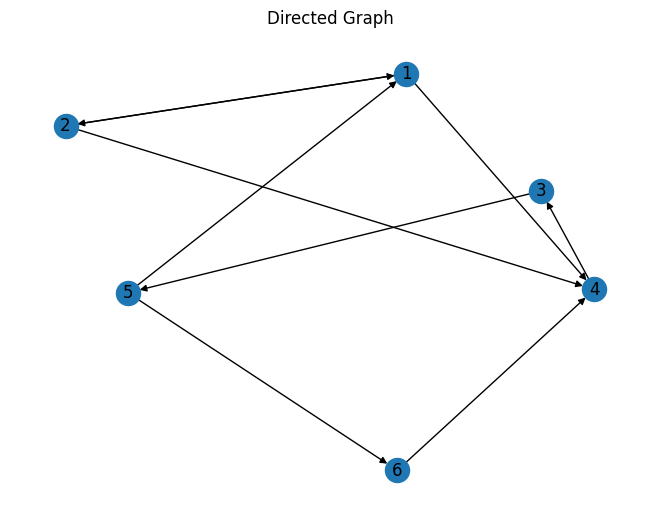

In [2]:
# Python has the networkx library to plot a directed graph

import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph() # to create a directed graph

# nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# edges
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(4, 3)
G.add_edge(3, 5)
G.add_edge(5, 1)
G.add_edge(5, 6)
G.add_edge(6, 4)

# plot
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Directed Graph")
plt.show()

Laplacian Matrix
* A graph with n nodes can be represented by a n x n adjacency matrix.
  * A value of 1 at row i, column j in the matrix indicates a connection between nodes v_i and v_j.
  * A value of 0 denotes no connection between the two nodes.
* A Laplacian matrix encodes properties of a graph's structure
  * Diagonal elements are the degree of each node.
  * Off diagonal elements are the connections between nodes.
* A Laplacian matric has the following properties:
  * L = D-M, where M is the adjacency matrix and D is the diagonal degree matric with D_ii = ∑ E_ik.
  * L = I_G I_G^T
  * L is symmetric positive semi-defininte. All eigenvalues of L are real and non-negative, and L has a full set of n real and orthogonal eigenvectors.
  * Let e = [1,...,1]^T. Then Le = 0. Thus 0 is the smallest eigenvalue and e is the corresponding eigenvector.
  * If the graph G has c connected components, then L has c eigenvalues that is 0.
  * For any vector x, x^TLx = ∑ {i,j}∈ E E_ij(x_i - x_j)^2
  * For any vector x and scalars α,β (αx + βe)^T L(αx + βe) = α^2 x^T Lx.

**4.2 - Spectarl Graph Bipartitioning**

Graph partition aims to find out a partition such that the cut is minimized.
* The cut is the total number of edges between two disjoint sets of nodes.
* Two types of performing this are the ratio cut and the normalized cut.

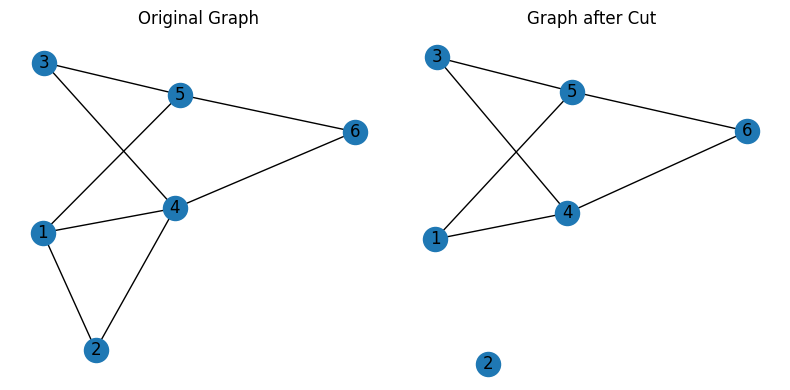

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph() # creat the graph

# nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

# edges
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(4, 3)
G.add_edge(3, 5)
G.add_edge(5, 1)
G.add_edge(5, 6)
G.add_edge(6, 4)

# define cut
cut_edges = [(1,2),(2,4)]

# remove the cut
G_cut = G.copy()
G_cut.remove_edges_from(cut_edges)

# plot the original
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.title("Original Graph")

# plot the cut
plt.subplot(1, 2, 2)
nx.draw(G_cut, pos, with_labels=True)
plt.title("Graph after Cut")

plt.tight_layout()
plt.show()